# Machine Learning and Statistics - Tasks
Assignment Tasks for Machine Learning and Statistics, GMIT 2020

Lecturer: dr Ian McLoughlin


>Author: **Andrzej Kocielski**  
>Github: [andkoc001](https://github.com/andkoc001/)  
>Email: G00376291@gmit.ie, and.koc001@gmail.com


___
## Introduction

This notebook forms a part of assignment to the Machine Lerning and Statistics module.

The notebook consist of discussion on four problems (tasks):

* Task 1 - Print on screen the square root of 2 to 100 decimal places, without use of external libraries.
* Task 2 - Verify the value of the $ 𝜒2 $ (chi-squared) test for a sample dataset and calculate the associated $ 𝑝 $ value.
* Task 3 - Simulate Excel function STDEC.S and STDEV.P using Numpy and explain advantages of the former.
* Task 4 - Apply k-means clustering algorithm to _Fisher's Iris_ data set using scikit-learn.

Detailed tasks description is available in the [assessment.pdf](https://github.com/andkoc001/Machine-Learning-and-Statistics/blob/main/assessment.pdf) file.

This Notebook should be read in conjunction with the corresponding `README.md` file at the project [repository](https://github.com/andkoc001/Machine-Learning-and-Statistics.git) at GitHub.

___
# Task 1 - square root

### Objectives
__Print on screen the square root of 2 to 100 decimal places, without use of external libraries__.

Write a Python function that calculates and prints to the screen the square root of 2 to 100 decimal places. The code should not depend on any module from the standard library or otherwise.

### Division of a range method

For any real number $ x $, that $ x > 1 $:

$$ \sqrt{x} \cdot \sqrt{x} = x $$

$$ 1 < \sqrt{x} < x $$

<br/>The last formula is an equivalent to $ 1^2 < (\sqrt{x})^2 < x^2 $. 

It can be further shown that the upper limitation follows the formula: $ \sqrt{x} < \frac{1+x}{2} $.

Hence, it is possible to approximate the value of $ \sqrt{x} $ by iteratively testing into which of the halves of the original range will it fall. This is done by performing the test: 

$$ (\sqrt{x})^2 < (\frac{1+x}{2})^2 $$

Then in the next iteration new boundary conditions are assumed. If the test is true, $ \frac{1+x}{2} $ becomes the right boundary; if the test is false, $ \frac{1+x}{2} $ becomes the left boundary. This way, the range tightens, increasing the precision, at each iteration.


___
**Example for $ x = 2 $:

The initial conditions is this: $ 1^2 < (\sqrt{2})^2 < 2^2 $.

In the first iteration, the left boundary is $ 1^2 = 1 $, and the right boundary is $ 2^2 = 4 $. 

Then we perform the test: $ (\frac{1+2}{2})^2 = 2.25 $, which is greater than $ (\sqrt{2})^2 = 2 $.  

Therefore, in the second iteration the left boundary remains $ 1^2 = 1 $, and the right boundary becomes $ \frac{1+2}{2} = 1.5 $.

We do the test again: $ (\frac{1+1.5}{2})^2 = 1.5625 $. This is less than $ (\sqrt{2})^2 = 2 $. 

In the third iteration the left boundary becomes $ \frac{1+1.5}{2} = 1.25 $, and the right boundary stays $ \frac{1+2}{2} = 1.5 $.

We do the test again: $ (\frac{1.25+1.5}{2})^2 = 1.890625 $. This is less than $ (\sqrt{2})^2 = 2 $. 

In the forth iteration the left boundary becomes $ \frac{1.25+1.5}{2} = 1.375 $, and the right boundary stays $ \frac{1+2}{2} = 1.5 $.

And so on...
___

This process may continue until required precision is achieved. 

For Python built-in data types, _while_ loop may govern the precision improvement process. However, Python allows only precision only to 15 digits precision.

Let's designate the required precision as $ \tau $. As long as $ (\frac{1+x}{2})^2 >= \tau $, the required precision is not achieved and another iteration is to be performed.

In [1]:
# Define number of which sqare root will be approximated
number = 2

# Define decimal places precision
precision = 15 # fiveteen decimal places appears to be the maximum for this data type

# Initial boundary conditions:
left = 1
right = number
middle = (left+right) / 2

# Implementing the logic
iteration = 0 

# Loop exit condition, i.e. requested precision is achieved
while abs(number-middle*middle) >= 10**-precision:
    
    # Testing which half of the range the square root of the number will fall into; tightening the boundaries
    if middle*middle > number:
        # if the condition is satisfied, the right boundary is changed to the previous mid-point
        right = middle
        
    else:
        # if the condition is not satisfied, the left boundaries is changed to the previous mid-point
        left = middle
    
    # Update the value of the variable 'middle'
    middle = (left+right) / 2
    
    # Update number of iteration
    iteration = iteration + 1

    # Print out intermediate results for each iteration
    # print(f"Iteration {iteration:3}, left: {left:18}, Sqare root: {middle:.16}, \tright: {right:18}")


# Print out the result

print(f"Iteration {iteration:3}, The sqare root of {number}: {middle:.16}")  

Iteration  49, The sqare root of 2: 1.414213562373095


### Arbitrary precision

The above method works fine, however, due to build-in data types limitations, the approximation is limited only to a certain precision ([Python documentation](https://docs.python.org/3/tutorial/floatingpoint.html)). The required precision can be easily achieved, with the application of a special-purpose data type - [decimal](https://docs.python.org/3/library/decimal.html#module-decimal) - for handling this kind of problems.

The true challenge of this task is to show the approximation of square root function with arbitrary assumed precision without using external libraries. There is a number of techniques allowing for achieving required (arbitrary) precision.

### Bitwise shift

One of the method is by the means of bitwise [arythmetic shift](https://en.wikipedia.org/wiki/Arithmetic_shift).

`>> 1` is a bitwise right shift, e.g. "divide by 2", `>> 2` would be "divide by 4", `>> n` is "divide by 2**(n)"  Right shift is an equivalent of powering the number (or squaring) in binary system (https://stackoverflow.com/questions/15557667/square-root-by-bit-shift).

![https://i.stack.imgur.com/S5kAd.png](https://i.stack.imgur.com/S5kAd.png)  
Image source: [Stack Overflow](https://stackoverflow.com/a/20369990)

For square root of 3 in binary (example from [Wikipedia](https://en.wikipedia.org/wiki/Shifting_nth_root_algorithm)):

```bash
     1. 7  3  2  0  5
    ----------------------
_  / 3.00 00 00 00 00
 \/  1 = 20×0×1+1^2
     -
     2 00
     1 89 = 20×1×7+7^2 (27 x 7)
     ----
       11 00
       10 29 = 20×17×3+3^2  (343 x 3)
       -----
          71 00
          69 24 = 20×173×2+2^2 (3462 x 2)
          -----
           1 76 00
                 0 = 20×1732×0+0^2 (34640 x 0)
           -------
           1 76 00 00
           1 73 20 25 = 20×17320×5+5^2 (346405 x 5)
           ----------
              2 79 75
```

Below application of the binary shift method for approximation of square root is adopted from https://stackoverflow.com/a/28151578.

In [2]:
### Method C - Newton's method
# Adapted from https://stackoverflow.com/a/28151578
''' Long integer square roots. Newton's method.
    Written by PM 2Ring. Adapted from C to Python 2008.10.19
'''

# the algorithm

def root(m):
    
    # Get initial approximation
    n, a, k = m, 1, 0
    
    while n > a:
        n >>= 1
        a <<= 1
        k += 1
        #print('\', k, ':', n, a) # for debugging

    # Go back one step & average
    a = n + (a>>2)
    
    #print(a) # for debugging

    # Apply Newton's method
    
    while k:
        a = (a + m // a) >> 1
        k >>= 1
        #print(k, ':', a) # for debugging
    
    result = a
    return result

# body of the main function
def main():
    
    # number to be square rooted, between 1 and 99 - outside the range there is possible error notation, beyond the scope of this task
    number = 2
    
    # number of decimal places to be shown
    precision = 100
    
    factor  = 10 ** (number * precision)
    m =  number * factor
    
    # print the result converted to a string
    string_result = str(root(m))
    
    # Check if the number is in the requested range
    if 1 <= number < 100:
        
        # take the first digit followed by a dot
        result = string_result[0:1] + "."
        
        # take the remaining digits up to set precision
        for i in string_result[1:precision]:
            result = result + i
    
        print("The Square Root of " + str(m/factor) + ":")
        print(result)
                
    else:
        print("Choose number to be squared between 1 and 99")
        
# execute only if run as a script
if __name__ == '__main__':
    main()

The Square Root of 2.0:
1.414213562373095048801688724209698078569671875376948073176679737990732478462107038850387534327641572


### Square root by subtraction method

The algorithm has been described by Frazer Jarvis in his paper [Square root by subtraction](http://www.afjarvis.staff.shef.ac.uk/maths/jarvisspec02.pdf).

Although this method converges slower than Newtons' method, it's advantage is that, "when finding square roots of integers, no infinite decimals are involved at any step, which can cause loss of precision due to rounding errors" ([ditto](http://www.afjarvis.staff.shef.ac.uk/maths/jarvisspec02.pdf)).

The algorithm is follows.

1) Initially, assume values of a and b:

`left = 5x`, where `x` is the number, which square root is being approximated and `right = 5` 

2) Then iteratively repeated these steps:

If `left ≥ right`, replace `left` with `left − right`, and add 10 to `right`.  

If `left < right`, add two zeros to the end of `left`, and add a zero to `right` just before
the final digit (which will always be ‘5’).

Keep repeating the above, until the digits of `right` gets sufficiently closely the digits of the square
root of `x`.

In [3]:
# Adapted from https://www.mathblog.dk/project-euler-80-digits-irrational-square-roots/

def Squareroot(n, prec):

    # Set the required parameters
    limit = 10**(prec+1) # extra precision to avoid rounding error
    left = 5 * n
    right = 5
 
    while right < limit:
        
        if left >= right:
            left -= right
            right += 10
            
        else:
            left *= 100
            right = 10 * right - 45;
       
    return right;



# body of the main function
def main():
    
    # number to be square-rooted, between 1 and 99 - outside the range there is possible error notation, beyond the scope of this task
    number = 2
    
    # number of decimal places to be shown
    precision = 100
    
    # call the main algorithm and print the result converted to a string
    string_result = str(Squareroot(number, precision))
    
    # Check if the number is in the requested range
    if 1 <= number < 100:
        
        # take the first digit followed by a dot
        result = string_result[0:1] + "."
        
        iteration = 0      
        # take the remaining digits up to set precision
        for i in string_result[1:precision]:
            result = result + i
            iteration += 1
            # print(f"Iter: {iteration:3}: {result}") # for debugging
               
        # print("Declared precision (including the digits before decimal point):", len(result))
        print("The Square Root of " + str(number) + ":")
        print(result)
                
    else:
        print("Choose number to be squared between 1 and 99")
        
        
# execute only if run as a script
if __name__ == '__main__':
    main()

The Square Root of 2:
1.414213562373095048801688724209698078569671875376948073176679737990732478462107038850387534327641572


### Result verification

The results from the above methods can be verified against the approximation of first one million digits of $\sqrt{2}$ published at https://apod.nasa.gov/htmltest/gifcity/sqrt2.1mil. Here, the first 102 digits (including that on the left of the decimal) is shown:

$ \sqrt{2} $= 1.4142 13562  37309 50488  01688 72420  96980 78569  67187 53769  48073 17667  97379 90732  47846 21070  38850 38753  43276 41572 73 

Thus, both of the applied methods produce results that are accurate to the specified precision.

___
### References - Task 1 related

- Wikipedia contributors - Taylor series. [online] Available at: <https://en.wikipedia.org/wiki/Taylor_series> [Accessed December 2020].
- Mateusz Kowalski - Matematyka, Wzór Taylora i Maclaurina, Przybliżanie Funkcji (in Polish) [online]. Available at: http://www.kowalskimateusz.pl/matematyka-wzor-taylora-i-maclaurina-przyblizanie-funkcji/ [Accessed December 2020]
- The Penn Calc Wiki, Taylor Series [online]. Available at: <http://calculus.seas.upenn.edu/?n=Main.TaylorSeries> [Accessed December 2020]
- NASA - Square root of 2 - the first million digits [online]. Available at: <https://apod.nasa.gov/htmltest/gifcity/sqrt2.1mil> [Accessed December 2020]
- Python manual on Decimal library [online]. Available at: <https://docs.python.org/3/library/decimal.html> [Accessed December 2020]
- Python manual on Bitwise Operations [online]. Available at: <https://wiki.python.org/moin/BitwiseOperators> [Accessed December 2020]
- Stack Overflow - find as many digits of the square root of 2 as possible [online]. Available at: <https://stackoverflow.com/a/15434306> [Accessed December 2020]
- Wikipedia contributors - Arithmetic shift. [online] Available at: <https://en.wikipedia.org/wiki/Arithmetic_shift> [Accessed December 2020].
- Wikipedia contributors - Shifting nth root algorithm. [online] Available at: <https://en.wikipedia.org/wiki/Shifting_nth_root_algorithm> [Accessed December 2020].
- Chris Lomont, 2003 - Fast Inverse Square Root[pdf]. Available at: <http://www.lomont.org/papers/2003/InvSqrt.pdf> [Accessed December 2020]
- Frazer Jarvis, 2005 - Square root by subtraction [pdf]. Available at: <http://www.afjarvis.staff.shef.ac.uk/maths/jarvisspec02.pdf> [Accessed December 2020]

___
# Task 2 - Chi-square test

### Objectives
__Verify the value of the $ {\chi}^2 $ (chi-squared) test for a sample dataset and calculate the associated $ p $ value__.

Use `scipy.stats` to verify this value and calculate the associated $ p $ value. You should include a short note with references justifying your analysis in a markdown cell.


### The Chi-squared test

The chi-squared test is a statistical tool suitable for categorical data values (for instance, colour or academic degree or dog breeds). It can be used for three applications, although in essence they test similar things: 1) the goodness of fit test (how one category data fits the distribution), 2) test for homogeneity (likelihood of different samples coming from the same population) and 3) test of independence [YouTube - Crash Course Statistics](https://www.youtube.com/watch?v=7_cs1YlZoug). 

For this task, Chi-squared **Test of independence** applies. Test of independence attempts to answer whether, in statistical terms, being a member of one category is independent of another. In other words, "the chi-square independence test is a procedure for testing if two categorical variables are related in some population" ([SPSS Tutorials](https://www.spss-tutorials.com/chi-square-independence-test/)).

The calculation compares the measured (observed) values against the expected values. The result of the chi-squared test is a numerical value that can be interpreted in such a way that it allows for seeing whether one variable is independent of another. This is often associated with the null hypothesis, and if the results are satisfactory, the null hypothesis is considered true. Otherwise, the alternative hypothesis prevails.

A generic formula of the Chi-squared test is like this (from [Wikipedia](https://en.wikipedia.org/wiki/Chi-squared_test)):

$$ {\chi}^2 = \sum_{k=1}^{n} \frac{(O_k - E_k)^2}{E_k}\ $$

where:  
$ n $ - number of categories,  
$ O $ - measurement from observation,  
$ E $ - expected value if the null hypothesis is true.

It is also worth noting that, in order to render the independence test viable, the expected value $ E_k > 5 $. Although that value is assumed arbitrarily, it is commonly used for practical application.

Also 'degrees of freedom' is required for assessing the independence test. The general formula for the degrees of freedom for tabularised data is as follows:

$$ df = (r-1)(c-1) $$
    
where:  
$ df $ - degrees of freedom,  
$ r $ - number of rows,  
$ c $ - number of columns.

The degree of freedom will affect the chi-squared distribution. Sample plots for various degrees of freedom are shown in the figure below.

<img src="https://spss-tutorials.com/img/chi-square-distributions-different-degrees-of-freedom.png" alt="Chi-squared distribution" style="width: 600px;"/>  

Image source: [SPSS Tutorials ](https://www.spss-tutorials.com/chi-square-independence-test/)

"The value of the chi-square random variable $ {\chi}^2 $ with degree of freedom $ df = k $ that cuts off a right tail of area c is denoted $ {\chi}^2_c $ and is called a critical value." [Saylor Academy](https://saylordotorg.github.io/text_introductory-statistics/s15-01-chi-square-tests-for-independe.html)

<img src="https://saylordotorg.github.io/text_introductory-statistics/section_15/34d06306c2e726f6d5cd7479d9736e5e.jpg" alt="Chi-squared critical value" style="width: 440px;"/>  

Image source: [Saylor Academy](https://saylordotorg.github.io/text_introductory-statistics/s15-01-chi-square-tests-for-independe.html)

### The problem

This task about evaluating the given data in terms of the Chi-squared test and verify the result also already given given in the Wikipedia article on [Chi-squared test](https://en.wikipedia.org/wiki/Chi-squared_test).

The data from the above Wikipedia page, describes the test scenario as follows. "Suppose there is a city of 1,000,000 residents with four neighborhoods: `A`, `B`, `C`, and `D`. A random sample of 650 residents of the city is taken and their occupation is recorded as "white collar", "blue collar", or "no collar". The null hypothesis is that each person's neighborhood of residence is independent of the person's occupational classification. The data is provided in a form of a contingency table as follows: ([Wikipedia](https://en.wikipedia.org/wiki/Chi-squared_test)):

|              |  A  |  B  |  C  |  D  | Total |
|--------------|-----|-----|-----|-----|-------|
| White collar |  90 |  60 | 104 |  95 |  349  |
| Blue collar  |  30 |  50 |  51 |  20 |  151  |
| No collar    |  30 |  40 |  45 |  35 |  150  |
|              |     |     |     |     |       |
| Total        | 150 | 150 | 200 | 150 |  650  |

The chi-squared test of independence verifies whether or not two categorical variables are independent of each other (statistically meaningful). The test assumes the 'null hypothesis' and the opposing 'alternative hypothesis'.

For the given sample data, the hypotheses are as follows (from the Wikipedia article):

**Null hypothesis** $ H_0 $ - "each person's neighborhood of residence is independent of the person's occupational classification",

**Alternative hypothesis** $ H_a $ - there is such a dependency.

The result of the test is already given in Wikipedia article: $ {\chi}^2 $ = 24.6, and so is the degrees of freedom: $ df $ = 6.


### Calculation

The chi-squared test of independence can be calculated using the statistical module `scipy.stats` from [Scipy](https://docs.scipy.org/doc/scipy/reference/stats.html) library for Python.

The function `chi2_contingency()` computes the chi-square and the value of $p$ for the hypothesis test of independence. It takes the observed frequencies as an input in a form of an array. As a result the function returns the values of chi-square test (`chi2`), the p-value (`p`), degrees of freedom (`dof`) and the array of the expected frequencies (`expected`).


In [4]:
# import required libraries
import numpy as np
from scipy.stats import chi2_contingency

In [5]:
# input the observed data manually into an array
data = np.array([[90, 60, 104, 95], [30, 50, 51, 20], [30, 40, 45, 35]])

# perform the calculation of the chi-square test of independence
chi2, p, dof, expected = chi2_contingency(data)

print(f"Chi-squared test: {chi2:.2f}")
print(f"P-value: {p:.5f}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies:\n {expected}")

Chi-squared test: 24.57
P-value: 0.00041
Degrees of freedom: 6
Expected frequencies:
 [[ 80.53846154  80.53846154 107.38461538  80.53846154]
 [ 34.84615385  34.84615385  46.46153846  34.84615385]
 [ 34.61538462  34.61538462  46.15384615  34.61538462]]


### The results and conclusion

The test of independence verifies whether or not there is a statistically meaningful relationship between categorical data. 

The above calculated results are shown below - the chi-square and the degrees of freedom results are in accord with the information provided in the [Wikipedia](https://en.wikipedia.org/wiki/Chi-squared_tes) page. 

$ {\chi}^2 \approx 24,6 $  
$ df = 6 $  
$ p \approx 0.00041 $  

Expected values:

|              |   A   |   B   |   C   |   D   |
|--------------|-------|-------|-------|-------|
| White collar |  80.5 |  80.5 | 107.4 |  80.5 | 
| Blue collar  |  34.8 |  34.8 |  46.5 |  34.8 |
| No collar    |  34.6 |  34.6 |  46.1 |  34.6 |
|              |       |       |       |       |
| Total        | 149.9 | 149.9 | 200.0 | 149.9 |


From the data provided by the survey and the calculated results, where the value of the chi-square is relatively large and the p-value is relatively small, we can infer that there is not evidence strong enough to support the null hypothesis statement ([NIST/SEMATECH](https://www.itl.nist.gov/div898/handbook/eda/section3/eda3674.htm)). The distribution of the occupational classification is due to the relationship between the person's neighborhood of residence and the person's occupational classification. In other words, there is relationship between the two categorical variables - they are dependent.

___
### References - Task 2 related

- Chi-squared test - Wikipedia contributors [online]. Available at: <https://en.wikipedia.org/wiki/Chi-squared_test> [Accessed December 2020].
- Chi-squared test - Wolfram MathWorld contributors. [online] Available at: <https://mathworld.wolfram.com/Chi-SquaredTest.html> [Accessed December 2020].
- Chi-squared test of independence - SPSS Tutorials [online]. Available at: <https://www.spss-tutorials.com/chi-square-independence-test/> [Accessed December 2020]
- Chi-squared test of independence - Stat Trek [online]. Available at: <https://stattrek.com/chi-square-test/independence.aspx> [Accessed December 2020]
- How the Chi-Squared Test of Independence Works - Statistics by Jim [online]. Available at: <https://statisticsbyjim.com/hypothesis-testing/chi-squared-independence/> [Accessed December 2020]
- Chi-kwadrat - Statystyka pomoc (in Polish) [online]. Available at: <http://statystyka-pomoc.com/Chi-kwadrat.html> [Accessed December 2020]  
- A Gentle Introduction to the Chi-Squared Test for Machine Learning [online]. Available at: <https://machinelearningmastery.com/chi-squared-test-for-machine-learning/> [Accessed December 2020]
-Saylor Academy - Introductory statistics, Chi-Square Tests for Independence [online]. Available at: <https://saylordotorg.github.io/text_introductory-statistics/s15-01-chi-square-tests-for-independe.html> [Accessed December 2020]
- CrashCourse - Chi-Square Tests: Crash Course Statistics (YouTube), [online] <https://www.youtube.com/watch?v=7_cs1YlZoug> [Accessed December 2020]
- Lisa Dierker - Chi-square test - Python (YouTube), [online] Available at: <https://www.youtube.com/watch?v=Pbo7VbHK9cY> [Accessed December 2020]
- Statistical functions (scipy.stats) - Scipy documentation [online]. Available at: <https://docs.scipy.org/doc/scipy/reference/stats.html> [Accessed December 2020]
- Joshua Cowley - Chi-Square Distribution Table [pdf] Available at: <http://kisi.deu.edu.tr/joshua.cowley/Chi-square-table.pdf> [Accessed December 2020]
- NIST/SEMATECH e-Handbook of Statistical Methods - Critical Values of the Chi-Square Distribution [online] Available at: <https://www.itl.nist.gov/div898/handbook/eda/section3/eda3674.htm> [Accessed December 2020]

___
# Task 3 - Standard Deviation


### Objectives
__Simulate Excel function `STDEC.S` and `STDEV.P` using Numpy and explain advantages of the former.__

Use NumPy to perform a simulation demonstrating that the STDEV.S calculation is a better estimate for the standard deviation of a population when performed on a sample.


### Standard deviation

_Standard deviation_ (SD) is a statistical concept, with a wide range of application, to measure how the data is spread out around the mean. [Dictionary.com](https://www.dictionary.com/browse/standard-deviation) defines it as "a measure of dispersion in a frequency distribution, equal to the square root of the mean of the squares of the deviations from the arithmetic mean of the distribution."

The standard deviation is defined as a square root of the average of the squared differences from the Mean [Mathisfun.com](https://www.mathsisfun.com/data/standard-deviation.html).

![Standard Deviation](https://upload.wikimedia.org/wikipedia/commons/f/f9/Comparison_standard_deviations.svg) Image source: [Wikipedia](https://simple.wikipedia.org/wiki/File:Comparison_standard_deviations.svg)

  
### Population and sample SD

There are two main methods of calculating the standard deviation. One that refers to the entire population and the other that consider the data set as a sample of the population. For simplicity, only discrete values are consider in this notebook.

The **standard deviation of population** ($\sigma$), is a measure that could be accurately calculated if the values of the variable were known for all population units; corresponds to the deviation of a random variable whose distribution is identical to the distribution in the population. This kind of standard deviation is often referred as to unbiased or uncorrected.

The the formula for population standard deviation ([Mathisfun.com](https://www.mathsisfun.com/data/standard-deviation-formulas.html)):
$$
\sigma = \sqrt{\frac{1}{N} \sum_{i=1}^n (x_i - \mu)^2}
$$
where:  
$N$ is the size of the population,
$x_i$ represents the observed value of the i-th member,
$\mu$ denotes population mean.

However, if the calculation is based on a part of the population only, the standard deviation of population tends to yield an error. In such cases, standard deviation of sample produces more reliable results. The **standard deviation of sample** ($s$), is a measure that estimates the standard deviation in a population based on the knowledge of only some of its objects, i.e. the random sample. For practical reasons this method is often the only viable option. This kind of standard deviation is often referred as to biased or corrected.

The the formula for sample standard deviation ([Mathisfun.com](https://www.mathsisfun.com/data/standard-deviation-formulas.html)):
$$
s = \sqrt{\frac{1}{N-1} \sum_{i=1}^n (x_i - \bar{x})^2}
$$
where $\bar{x}$ denotes sample mean.

The Microsoft Excel's functions `STDEC.S` and `STDEV.P` are used to calculate standard deviation of **sample** and **population** respectively.

### Standard deviation in NumPy 

NumPy library for Python allows for calculating the standard deviation The function `numpy.std()` is used for this purpose. The syntax employed for the calculation takes the following form:  
`std = sqrt(mean(abs(x - x.mean())**2))`  
where x is value of an observation.

NumPy allows for calculating the standard deviation both of population and of sample. The correction is controlled by the function parameter `ddof`, which by default equals zero (standard deviation of population).

"The average squared deviation is normally calculated as `x.sum() / N`, where `N = len(x)`. If, however, `ddof` is specified, the divisor `N - ddof` is used instead. In standard statistical practice, `ddof=1` provides an unbiased estimator of the variance of the infinite population. `ddof=0` provides a maximum likelihood estimate of the variance for normally distributed variables. The standard deviation computed in this function is the square root of the estimated variance, so even with `ddof=1`, it will not be an unbiased estimate of the standard deviation per se" ([NumPy](https://numpy.org/doc/stable/reference/generated/numpy.std.html)).

In [6]:
# import NumPy
import numpy as np

### Simulation

The task involves development of a simulation that would allow comparing the results of the standard deviation of population and of sample when performed on a sample.

Let's imagine a scenario where a manufacturing plant produces machining parts. One of the production stages is about honing a cylinder to a given diameter. The process target value is 100mm. The actual dimension is achieved with some deviation that follows the normal distribution pattern around the target value ([Statistical Process Control](https://www.moresteam.com/toolbox/statistical-process-control-spc.cfm)). Because it it economically not viable, only certain portion of the workpieces is analysed post-process.

The mock data is generated and assigned as shown below. In order to promote the validity of the experiment and to reduce the repetitiveness, a certain random number generator seed is used.

In [7]:
# setting the seed
seed = 2020  # seed value pre-set, selected arbitrarily
np.random.seed(seed) # ensures the generated numbers are the same

# target diameter
target_diameter = 100

# standard deviation
tolerance = 0.005

# total number of parts
total_number = 1000

# generating the random values of the mechined diameter
mu, sigma = target_diameter, tolerance # mean and standard deviation
diameter = np.random.normal(mu, sigma, 1000) 

# sample size
sample_size = 50

# sample elements - first 100 elements from the main data set
sample = diameter[:sample_size]

print("Total number:\t", len(diameter))
print(f"Minimum:\t {diameter.min():.5f}")
print(f"Mean:\t\t {diameter.mean():.5f}")
print(f"Maximum:\t {diameter.max():.5f}")
print(f"Std dev of entire population (NumPy): {diameter.std():.5f}")

Total number:	 1000
Minimum:	 99.98565
Mean:		 99.99983
Maximum:	 100.01550
Std dev of entire population (NumPy): 0.00487


Now, let's evaluate the standard deviation of the population (SD_P) of the sample:
$
\sigma = \sqrt{\frac{1}{N} \sum_{i=1}^n (x_i - \mu)^2}
$
and standard deviation of the sample (SD_S) of the sample:
$
s = \sqrt{\frac{1}{N-1} \sum_{i=1}^n (x_i - \bar{x})^2}
$
.

In [8]:
print("Sample size:\t", len(sample))
print(f"Sample Min:\t {sample.min():.5f}")
print(f"Sample Mean:\t {sample.mean():.5f}")
print(f"Sample Max:\t {sample.max():.5f}")
print(12*".")

# Calculate standard deviation of the population (sd_p) based on the sample
# np.sqrt(np.sum((x - np.mean(x))**2)/len(x))
# auxiliary variable
sum = 0
# iterate over elements of the array
for x in np.nditer(sample):
    sum = sum + (x - np.mean(sample))**2
sd_p = np.sqrt(sum/sample_size)
print(f"Sample SD_P:\t {sd_p:.5f}")

# Calculate standard deviation of the sample (sd_s) based on the sample
# np.sqrt(np.sum((x - np.mean(x))**2)/len(x-1))
# auxiliary variable
sum = 0
# iterate over elements of the array
for x in np.nditer(sample):
    sum = sum + (x - np.mean(sample))**2   
sd_s = np.sqrt(sum/(sample_size-1))
print(f"Sample SD_S:\t {sd_s:.5f}")

Sample size:	 50
Sample Min:	 99.99116
Sample Mean:	 99.99948
Sample Max:	 100.01045
............
Sample SD_P:	 0.00476
Sample SD_S:	 0.00481


The above results needs to be compared to the benchmark, that is standard deviation of population performed on entire population

In [9]:
# standard deviation of population on entire population - benchmark
# auxiliary variable
sum = 0
# iterate over elements of the array
for x in np.nditer(diameter):
    sum = sum + (x - np.mean(diameter))**2
SD = np.sqrt(sum/total_number)

print(f"Std deviation on entire population:\t {SD:.5f}")

# Relative error of sd_p
print(f"Relative error of the standard deviation on population performed on sample (sd_p):\t {(abs(sd_p-SD)/SD):.5f}")

# Relative error of sd_s
print(f"Relative error of the standard deviation on sample performed on sample (sd_s):\t\t {(abs(sd_s-SD)/SD):.5f}")

Std deviation on entire population:	 0.00487
Relative error of the standard deviation on population performed on sample (sd_p):	 0.02335
Relative error of the standard deviation on sample performed on sample (sd_s):		 0.01343


### Conclusion 

In the example above, the two methods of calculating the standard deviation performed on sample produced an error when compared to standard deviation performed on population (benchmark). 

Although standard deviation of the entire population yields an accurate results (every observation is considered), for practical reasons is often not viable (for example, it is hard to imagine taking the height of every person) and measurements are taking on a part of the population only (sample). It is assumed, that the sample is representative to the entire population and the size of the sample is large enough from statistics perspective. 

The above simulation revealed that standard deviation of sample yields a biased result. However, by implementing a correction parameter (degree of freedom) - that is standard deviation of sample - reduce the error. Depending on the statistical characteristics of the data set, it can often produce a good estimate. 

___
### References - Task 3 related

- Wikipedia Contributors - Standard Deviation [online] Available at: <https://en.wikipedia.org/wiki/Standard_deviation> [Accessed December 2020]
- Tech Book Report - Standard Deviation In 30 Seconds [online] Available at: <http://www.techbookreport.com/tutorials/stddev-30-secs.html> [Accessed December 2020]
- Math is fun - Standard Deviation and Variance [online] Available at: <https://www.mathsisfun.com/data/standard-deviation.html> [Accessed December 2020]
- Microsoft support - STDEV.P function [online] Available at: <https://support.microsoft.com/en-us/office/stdev-p-function-6e917c05-31a0-496f-ade7-4f4e7462f285> [Accessed December 2020]
- Microsoft support - STDEV.S function [online] Available at: <https://support.microsoft.com/en-us/office/stdev-s-function-7d69cf97-0c1f-4acf-be27-f3e83904cc23> [Accessed December 2020]
- Exceltip - How To Use Excel STDEV.P Function [online] Available at: <https://www.exceltip.com/statistical-formulas/how-to-use-excel-stdev-p-function.html> [Accessed December 2020]
- Good Data - Standard Deviation Functions [online] Available at: <https://help.gooddata.com/doc/en/reporting-and-dashboards/maql-analytical-query-language/maql-expression-reference/aggregation-functions/statistical-functions/standard-deviation-functions> [Accessed December 2020]
- NumPy documentation - Standard Deviation (numpy.std) [online] Available at: <https://numpy.org/doc/stable/reference/generated/numpy.std.html> [Accessed December 2020]
- Stack Overflow contributors - STDEV.S and STDEV.P using numpy [online] Available at: <https://stackoverflow.com/questions/64884294/stdev-s-and-stdev-p-using-numpy> [Accessed December 2020]
- More Steam - Statistical Process Control [online] Available at: <https://www.moresteam.com/toolbox/statistical-process-control-spc.cfmn> [Accessed December 2020]

___
# Task 4 - K-means clustering


### Objectives
__Apply k-means clustering algorithm to Fisher's Iris data set using `scikit-learn`.__

Explain in a Markdown cell how your code works and how accurate it might be, and then explain how your model could be used to make predictions of species
of iris.



### Fisher's Iris data set

The data set in question is a collection of Iris flowers properties, collated by Roland Fisher.

The data consist of 150 observations, divided into three classes with 50 observations per each class, representing the iris species. Each observation describe measurements from a flower. The collected properties (data set attributes) represent respectively:

- sepal length, cm,
- sepal width, cm,
- petal length, cm,
- petal width, cm,
- species of the iris (Setosa, Versicolour, Virginica). 

The data set for this task has been obtained from the _UC Irvine Machine Learning Repository_, https://archive.ics.uci.edu/ml/datasets/iris. 

### K-means classification algorithm

K-means is one of the unsupervised learning clustering algorithms. It is used to categorise elements into groups (clusters) based on the elements properties values. 

The aggregation is carried out based on the initial arbitrary division of the population into a specific number (k) of clusters. The process of cluster formation is done iteratively by assigning the elements to clusters. Each cluster is represented by a cluster centre that is the vector of mean attribute values of training instances. Cluster modeling in is typically done by applying the distance function to match instances against cluster centers [IBM.com](https://www.ibm.com/support/producthub/iias/docs/content/SSHRBY/com.ibm.swg.im.dashdb.analytics.doc/doc/r_kmeans_clustering.html). The belonging of an element to the clusters is based on the shortest distance to the cluster centre. 

The aim of the technique is to the maximise the similarity of elements in each of the clusters while maximising the difference between the clusters.

The typical steps of the k-means algorithm ([Statystyka.az.pl](https://www.statystyka.az.pl/analiza-skupien/metoda-k-srednich.php)):
1. Determine the number of clusters.
Typically, the number of clusters is chosen arbitrarily and possibly optimised later for better results.
2. Establish the initial cluster centres.
The cluster centres should be selected in such a way as to maximize cluster distances. One of the methods is to run the algorithm several times, with the cluster centers initially being randomized, and choose the best model.
3. Calculate the distances of objects from the centers of clusters.
This step determines which observations are considered similar and which different from each other. The most commonly used distance is the the square of the distance in Euclidean space.
4. Assign objects to clusters
For a given observation, we compare the distances from all clusters and assign them to the cluster with the closest center.
5. Create new aggregation centers
Most often, the new center of focus is a point whose coordinates are the arithmetic mean of the coordinates of the points belonging to a given cluster.
6. Follow steps 3, 4, 5 until the stop condition is met.
The most common stop condition is the number of iterations given at the beginning, or no object moves between clusters.

K-means algorithm needs data for training. Based on the results, it is possible to predict belonging of other points to the clusters. 
![Classification - training](https://miro.medium.com/max/700/0*Xqmluj4gGNBd8GEC.png)
![Classification - prediction](https://miro.medium.com/max/700/0*wVM7U0bDfuNPLptJ.png)
Image source: [towardsdatascience.com](https://towardsdatascience.com/classification-regression-and-prediction-whats-the-difference-5423d9efe4ec)

### Application of the k-means 

This section is based on the lecture videos and the `sci-kit learn` tutorial.

In [11]:
# Numerical arrays
import numpy as np

# Data tabularised
import pandas as pd

# Machine learning - KMeans
import sklearn.cluster as skcl

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# get the data set
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# assign data set to dataframe 'df'
df = pd.read_csv(url, sep=',', names = ["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width", "Species"])

In [13]:
# the first few observations
df.head(4)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa


A single data plot is worth thousand of data pints - data set visualisation.

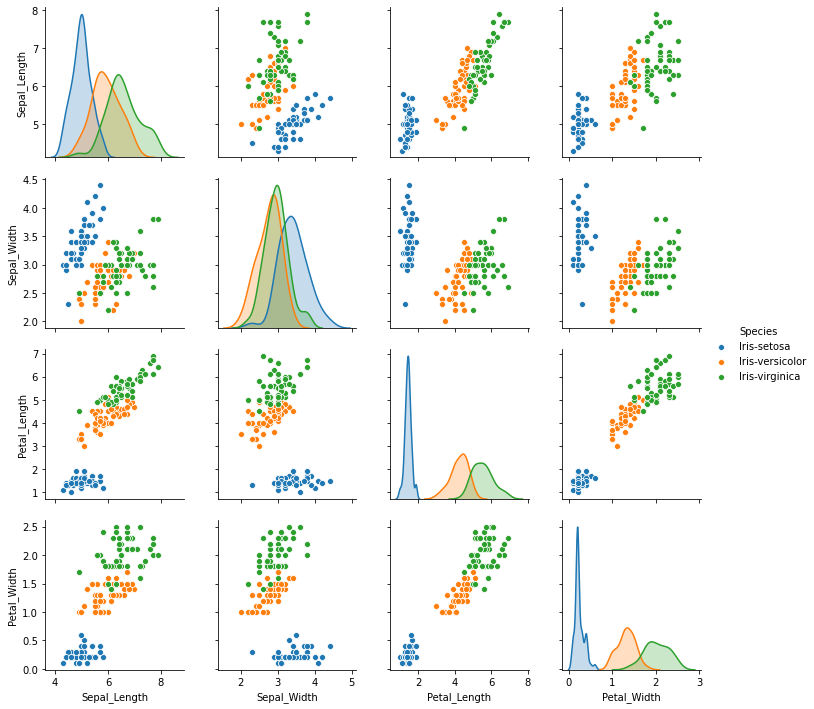

In [14]:
# a glance into the data set plot
#pd.plotting.scatter_matrix(df, figsize=(12,8))
sns.pairplot(df, hue = "Species")
plt.show()

Based on the above, _petal length_ and _sepal width_ appear to attributes that discriminate the species best and will be used in the subsequent analysis. 

In order to apply k-means, using scikit-learn, the dataframe must be without any categorical column. Below a new dataframe `X` is created, without the _species_ column.

In [15]:
# Drop the class column (descriptive) in order to apply the KMeans class. Next, assign new data set to variable X
X = df.drop('Species', 1)
X.head(3)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [16]:
# Perform kmeans fitting.
kmeans = skcl.KMeans(n_clusters=3, random_state=0).fit(X)

Now, lets see to which cluster each of the observation was assigned by the algorithm

In [18]:
# assign cluster centres to the variable cent
cent = kmeans.cluster_centers_

# convert the cluster centres into a dataframe with appropriate headings
centres = pd.DataFrame({'Sepal_Length': cent[:, 0], 'Sepal_Width': cent[:, 1], 'Petal_Length': cent[:, 2], 'Petal_Width': cent[:, 3]})
# centres # commented out for readibility

There are three distinct clusters. but do they match the original species? Let's first evaluate the accuracy of the prediction quantitatively.

In [19]:
# add the labels to the dataframe in extra column 'Cluster_label'
df['Cluster_label'] = pd.Series(kmeans.labels_, index=df.index)
# df.tail(3) # commented out for readibility

As we can see, each observation was assigned to one of three clusters (0, 1 or 2). It appears the labels were to match the species as follows:

| Iris species | Cluster label |
|:------------:|:-------------:|
| Setosa       |       1       |
| Versicoulor  |       2       |
| Virginica    |       0       |

For a better readability and also further analysis, the numerical clusters designation will be changed to the corresponding species names.

In [20]:
# replace values of 'Cluster_label' column - numerical values with descriptive
df.loc[:,"Cluster_label"] = df.loc[:,"Cluster_label"].replace([1, 2, 0], ["Iris-setosa", "Iris-versicolor", "Iris-virginica"])

In [21]:
# check a few random rows in the dataframe
df.sample(4) 

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species,Cluster_label
88,5.6,3.0,4.1,1.3,Iris-versicolor,Iris-versicolor
22,4.6,3.6,1.0,0.2,Iris-setosa,Iris-setosa
141,6.9,3.1,5.1,2.3,Iris-virginica,Iris-virginica
54,6.5,2.8,4.6,1.5,Iris-versicolor,Iris-versicolor


In [22]:
df["Cluster_label"].value_counts()

Iris-versicolor    62
Iris-setosa        50
Iris-virginica     38
Name: Cluster_label, dtype: int64

In [23]:
# asign initial the labels of the points.
kmeans.labels_

# check frequency
df["Cluster_label"].value_counts()

Iris-versicolor    62
Iris-setosa        50
Iris-virginica     38
Name: Cluster_label, dtype: int64

In [24]:
df.loc[:,"Match"] = np.where(df["Species"] == df["Cluster_label"], True, False)

# Filter to show only these observations with correct assignment
df_true = df[df["Match"] == True]

# Filter to show only these observations with incorrect assignment
df_false = df[df["Match"] == False]

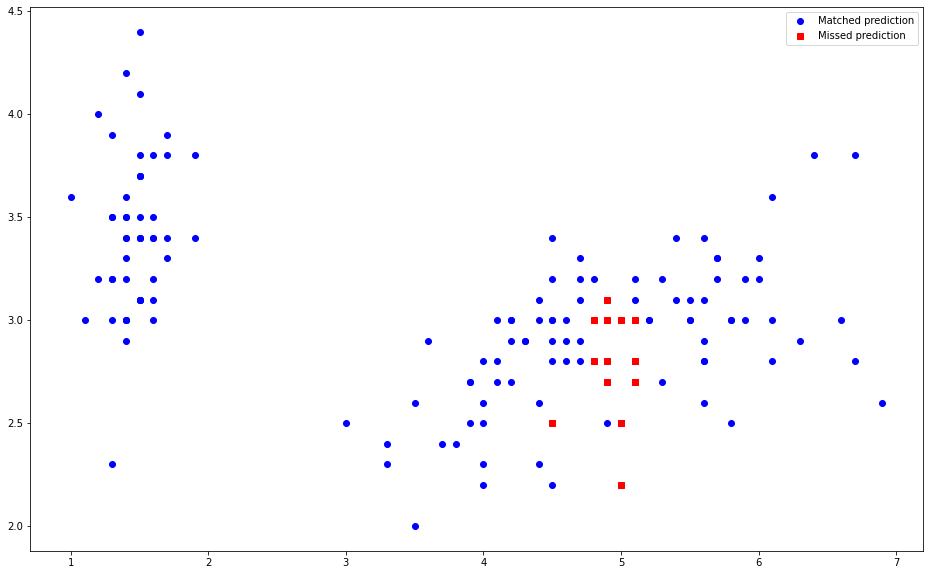

In [26]:
# show all data points
# plt.plot(df.loc[:,"Petal_Length"], df.loc[:,"Sepal_Width"], 'g.')

# Plot the data set which were correctly clustered
plt.plot(df_true.loc[:,"Petal_Length"], df_true.loc[:,"Sepal_Width"], 'bo', label="Matched prediction")

# Plot the data set which were not correctly clustered
plt.plot(df_false.loc[:,"Petal_Length"], df_false.loc[:,"Sepal_Width"], 'rs', label="Missed prediction")

plt.rcParams['figure.figsize'] = [16, 10] # change the settings of the plot size

plt.legend()
plt.show()

Let's see what the predicted clusters look like on the plot.

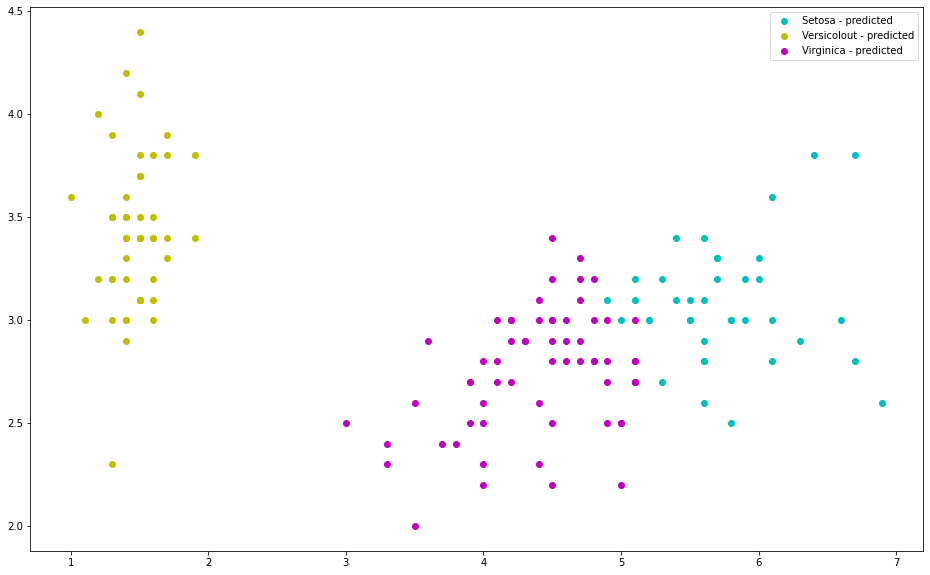

In [27]:
# Plot the data set discriminated by labels.
plt.plot(X[kmeans.labels_ == 0].loc[:,"Petal_Length"], X[kmeans.labels_ == 0].loc[:,"Sepal_Width"], 'co', label="Setosa - predicted")
plt.plot(X[kmeans.labels_ == 1].loc[:,"Petal_Length"], X[kmeans.labels_ == 1].loc[:,"Sepal_Width"], 'yo', label="Versicolout - predicted")
plt.plot(X[kmeans.labels_ == 2].loc[:,"Petal_Length"], X[kmeans.labels_ == 2].loc[:,"Sepal_Width"], 'mo', label="Virginica - predicted")
plt.rcParams['figure.figsize'] = [16, 10] # change the settings of the plot size

plt.legend()
plt.show()

As seen, the algorithm put some of the flowers into wrong category (cluster). But let's look deeper at the results and compare the result with the actual classification on a single plot.

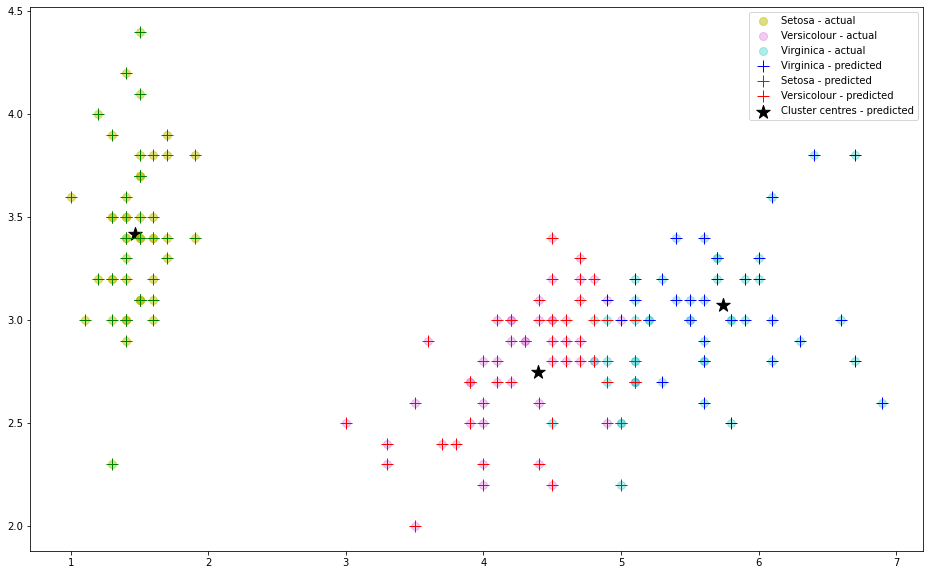

In [28]:
# actual - represented with dots
plt.plot(df[df["Species"] == "Iris-setosa"].loc[:,"Petal_Length"], df[df["Species"] == "Iris-setosa"].loc[:,"Sepal_Width"], 'yo', markersize=8, alpha=0.5, label="Setosa - actual")
plt.plot(df[df["Species"] == "Iris-versicolor"].loc[:,"Petal_Length"], df[df["Species"] == "Iris-versicolor"].loc[:,"Sepal_Width"], 'mo', markersize=8, alpha=0.2, label="Versicolour - actual")
plt.plot(df[df["Species"] == "Iris-virginica"].loc[:,"Petal_Length"], df[df["Species"] == "Iris-virginica"].loc[:,"Sepal_Width"], 'co', markersize=8, alpha=0.3, label="Virginica - actual")

# predicted - represented with 'x's
plt.plot(X[kmeans.labels_ == 0].loc[:,"Petal_Length"], X[kmeans.labels_ == 0].loc[:,"Sepal_Width"], 'b+', markersize=12, label="Virginica - predicted")
plt.plot(X[kmeans.labels_ == 1].loc[:,"Petal_Length"], X[kmeans.labels_ == 1].loc[:,"Sepal_Width"], 'g+', markersize=12, label="Setosa - predicted")
plt.plot(X[kmeans.labels_ == 2].loc[:,"Petal_Length"], X[kmeans.labels_ == 2].loc[:,"Sepal_Width"], 'r+', markersize=12, label="Versicolour - predicted")

# centres - represented with stars
plt.scatter(centres.loc[:,"Petal_Length"], centres.loc[:,"Sepal_Width"], marker='*', c='black', s=200, label="Cluster centres - predicted")

plt.legend(loc="upper right")
plt.show()

Let us see which of the predicted observations were assigned correctly to the corresponding group, and which were not, by comparing the result with the actual classification.

In [29]:
# https://www.kite.com/python/answers/how-to-compare-two-pandas-dataframe-columns-in-python
Match = np.where(df["Species"] == df["Cluster_label"], True, False)

In [30]:
# accurace for iris-setosa - frequency of correct predictions (True)
unique, counts = np.unique(Match[:50], return_counts=True)
dict(zip(unique, counts))

{True: 50}

In [31]:
# accurace for iris-versicolor - frequency of correct predictions (True)
unique, counts = np.unique(Match[50:100], return_counts=True)
dict(zip(unique, counts))

{False: 2, True: 48}

In [32]:
# accurace for iris-virginica - frequency of correct predictions (True)
unique, counts = np.unique(Match[100:], return_counts=True)
dict(zip(unique, counts))

{False: 14, True: 36}

All in all, there is 134 correct elements assignment to the clusters, and 16 incorrect. The overall accuracy of the model for the iris data set is therefore:

In [33]:
accuracy = np.sum(Match) / df.shape[0]
float("{:.2f}".format(accuracy))

0.89

### Conclusion

K-means is useful and ease to implement clustering algorithm (readily available functions within scikit-learn library). It allows grouping the data points in euclidean space depending on the points location. 

The algorithm is not perfect, however, and the occurrence of errors are very likely. In the analysed Iris data set, with _petal length_ and _sepal width_ selected as variables, the model accuracy is 89%. 

The accuracy depends on, among others, the properties of the measured values, their distribution in the plot, number of clusters, distance between the clusters and distribution of the data points around the cluster centres. Therefore, a significant care must be taken while interpreting the results. 

___
### References - Task 4 related

https://en.wikipedia.org/wiki/K-means_clustering  
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans  
https://realpython.com/k-means-clustering-python/  
https://www.ibm.com/support/producthub/iias/docs/content/SSHRBY/com.ibm.swg.im.dashdb.analytics.doc/doc/r_kmeans_clustering.html  
https://blogs.oracle.com/datascience/introduction-to-k-means-clustering  
https://towardsdatascience.com/classification-regression-and-prediction-whats-the-difference-5423d9efe4ec 
https://mmuratarat.github.io/2019-07-23/kmeans_from_scratch  

___
Andrzej Kocielski